In [122]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import  classification_report
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [123]:
data = "../DataSets/16325569497737558.csv"
df = pd.read_csv(data)

In [124]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
heart_df = df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']]
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [127]:
x = np.array(heart_df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']])
x[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [128]:
y = np.asarray(heart_df['output'])
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [129]:
#preprocessing
scaler = preprocessing.StandardScaler()
x_scaler = scaler.fit(x).transform(x)
x_scaler[:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
         1.09, -2.27, -0.71, -2.15],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
         2.12, -2.27, -0.71, -0.51],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
         0.31,  0.98, -0.71, -0.51],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.21,  0.98, -0.71, -0.51],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.38,  0.98, -0.71, -0.51]])

In [130]:
#train_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [131]:
#model_Logistic
#solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
LR = LogisticRegression(C = 0.1, solver = 'liblinear').fit(x_train, y_train)

#model_SVM
#kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SV = svm.SVC(kernel = 'poly')
SV.fit(x_train, y_train)

#model_DT
DT = DecisionTreeClassifier(criterion = "gini", max_depth = 4)
DT.fit(x_train, y_train)

#modelKNN
k = 2
k_Nearest_Neighbor = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
k_Nearest_Neighbor

KNeighborsClassifier(n_neighbors=2)

In [132]:
#logistic
y_predictedLogistic = LR.predict(x_test)
y_probLgistic = LR.predict_proba(x_test)

In [133]:
#SVM
y_predictedSVM = SV.predict(x_test)

In [134]:
#DT
y_predictedDT = DT.predict(x_test)

In [135]:
#KNN
y_predictedKNN = k_Nearest_Neighbor.predict(x_test)

In [136]:
print(heart_df['output'].value_counts())

1    165
0    138
Name: output, dtype: int64


In [137]:
#jacardLogistic
print(jaccard_score(y_test, y_predictedLogistic, pos_label = 0))

#jacardSVM
print(jaccard_score(y_test, y_predictedSVM, pos_label = 0))

#jacardDT
print(jaccard_score(y_test, y_predictedDT, pos_label = 0))

#jacardKNN
print(jaccard_score(y_test, y_predictedKNN, pos_label = 0))

0.8076923076923077
0.45161290322580644
0.6785714285714286
0.4523809523809524


In [138]:
#KNN
print("Accuracy of train:", metrics.accuracy_score(y_train, k_Nearest_Neighbor.predict(x_train)))
print("Accuracy of test: ", metrics.accuracy_score(y_test, y_predictedKNN))

Accuracy of train: 0.8057851239669421
Accuracy of test:  0.6229508196721312


In [139]:
#DT
print(metrics.accuracy_score(y_test, y_predictedDT))

0.8524590163934426


In [140]:
#conf_matrix
def plot_confusion_matrix(cm, classes, normalize = 'False', cmap = plt.cm.Blues, title='title'):
     """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
     if normalize:
          cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
          print("Normalized confusion matrix")
     else:
          print('Confusion matrix, without normalization')
     print(cm)

     plt.imshow(cm, interpolation = 'nearest', cmap = cmap)           
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)

     fmt = '.2f' if normalize else 'd'
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_predictedLogistic, labels=[1,0]))

[[35  1]
 [ 4 21]]


Confusion matrix, without normalization
[[35  1]
 [ 4 21]]


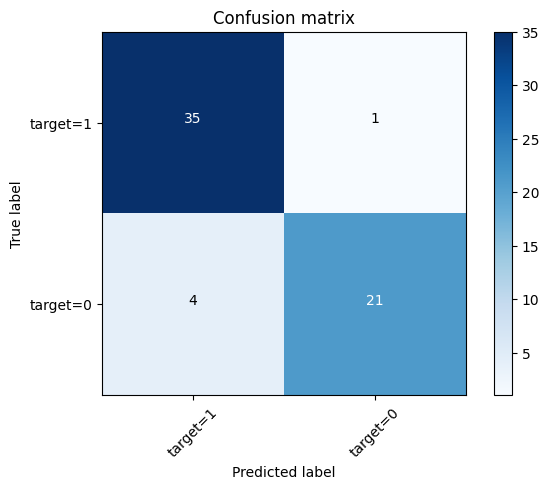

In [141]:
#compute_conf_matrixLogistic
conf_matrixLogisitic = confusion_matrix(y_test, y_predictedLogistic, labels = [1,0])
np.set_printoptions(precision = 2)

#plotLogistic
plt.figure()
plot_confusion_matrix(conf_matrixLogisitic, classes = ['target=1', 'target=0'], normalize = False, title = 'Confusion matrix')

Confusion matrix, without normalization
[[30  6]
 [11 14]]


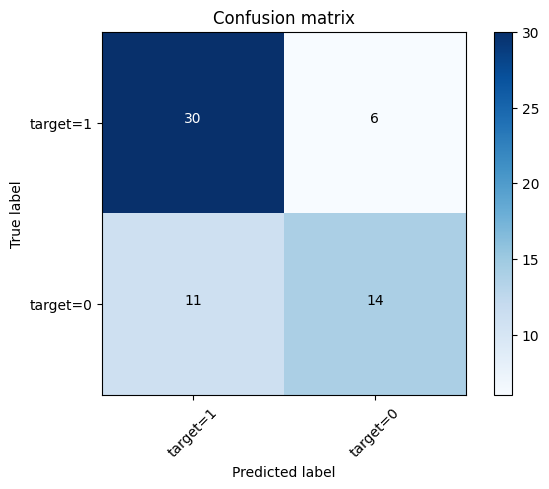

In [142]:
#compute_conf_matrixSVM
conf_matrixSVM = confusion_matrix(y_test, y_predictedSVM, labels= [1,0])
np.set_printoptions(precision = 2)

#plotSVM
plt.figure()
plot_confusion_matrix(conf_matrixSVM, classes = ['target=1', 'target=0'], normalize = False, title = 'Confusion matrix')

Confusion matrix, without normalization
[[33  3]
 [ 6 19]]


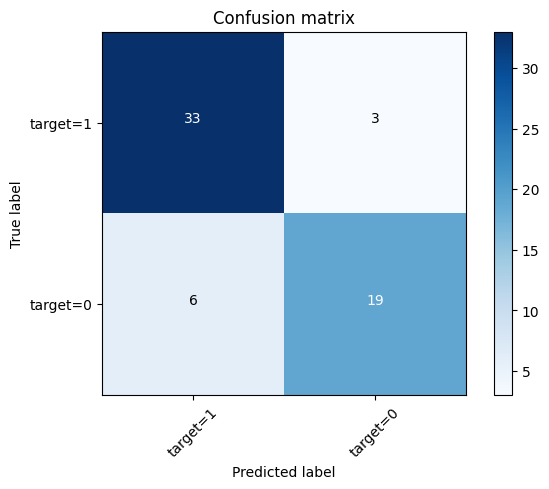

In [143]:
#conf_matrixDT
conf_matrixDT = confusion_matrix(y_test, y_predictedDT, labels = [1,0])

plot_confusion_matrix(conf_matrixDT, classes = ['target=1', 'target=0'], normalize = False, title = 'Confusion matrix')

Confusion matrix, without normalization
[[19 17]
 [ 6 19]]


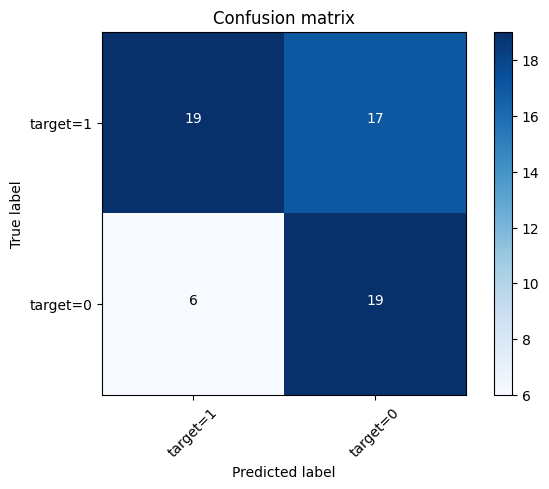

In [144]:
#conf_matrixKNN
conf_matrixKNN = confusion_matrix(y_test, y_predictedKNN, labels = [1,0])

plot_confusion_matrix(conf_matrixKNN, classes = ['target=1', 'target=0'], normalize = False, title = 'Confusion matrix')

In [145]:
#Logistic
print(classification_report(y_test, y_predictedLogistic))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61



In [146]:
#SVM
print(classification_report(y_test, y_predictedSVM))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62        25
           1       0.73      0.83      0.78        36

    accuracy                           0.72        61
   macro avg       0.72      0.70      0.70        61
weighted avg       0.72      0.72      0.71        61



In [147]:
#DT
print(classification_report(y_test, y_predictedDT))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



In [148]:
#KNN
print(classification_report(y_test, y_predictedKNN))

              precision    recall  f1-score   support

           0       0.53      0.76      0.62        25
           1       0.76      0.53      0.62        36

    accuracy                           0.62        61
   macro avg       0.64      0.64      0.62        61
weighted avg       0.66      0.62      0.62        61



In [149]:
#log_lossLogistic
print (log_loss(y_test, y_probLgistic))

0.3320790120700794
